# Week 8: Acquiring and Manipulating Videos

<font size="6"> Laboratory 7 </font> <br>
<font size="3"> Last updated August 17, 2022 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- N/A
    
<font size="5"> Programming Skills </font>
- Using Software Documentation
- OpenCV (cv2)
    
<font size="5"> Embedded Systems </font>
- Thonny and MicroPython

## <span style="color:orange;"> 0. Required Hardware </span>
- Microcontroller: Raspberry Pi Pico
- Breadboard
- USB connector
- Camera (Arducam HM01B0)

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Answer Key

**Email:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## <span style="color:orange;"> 1. Reading Videos with OpenCV </span>

In this lab, we will be using a Python library called OpenCV (cv2). From the [official documentation](https://docs.opencv.org/4.x/d1/dfb/intro.html), "OpenCV is an open-source library that includes several hundreds of computer vision algorithms." Today, we will mostly be using it to read and display modified video frames, and we will be doing the "vision" in computer vision manually with our own functions.

Run the following cell to read in the video file. Using `vid.read()`, returns two values: the Boolean varible `success`, which is `True` if the frame was read without any errors, and `frame` which is as it sounds the image that is captured from the video. The camera hardware you will connect to your Pico can only return grayscale images, so we are converting each frame to grayscale using the function `cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)`. For speed in later computations, it is helpful to reduce the frame size. Here, we've scaled down each frame by a factor of 4.

Running the cell will cause a separate window to pop up, displaying the smaller, grayscale video. After reading in the whole video, the separate window will close automatically; you can override this by pressing the "Q" key on your keyboard.

Download the video file we'll be using for this lab: [test_vid.mov](https://github.com/TheDataScienceLabs/DataLab_Multivariate_Calculus/blob/main/book/labs/2_Video_Labs/test_vid.mov). This is a video from Youtube showing a bouncing ball.
<!-- COPYRIGHTS???? It would be best to make our own. -->

In [2]:
import timeit
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 

def video_1():
    scale = 0.25
    new_size = (int(width*scale),int(height*scale))
    while vid.isOpened():
        success, frame = vid.read()
        if not success:
            print("Unable to read frame. Exiting ...")
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.resize(frame,dsize=new_size)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
            break
        
    return



def video_2():
    scale = 0.125
    new_size = (int(width*scale),int(height*scale))
    while vid.isOpened():
        success, frame = vid.read()
        if not success:
            print("Unable to read frame. Exiting ...")
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.resize(frame,dsize=new_size)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
            break
        
    return

%timeit video_1()
vid.release()
cv2.destroyAllWindows()

419 ns ± 18.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### <span style="color:red"> Exercise 1 </span>

Open and watch the above video again, this time scaled down each frame by a factor of 8. How much less CPU time does it take to play the video, compared to when you only scaled it down by a factor 4?


<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Below </h3>

The first time: 67.7 microseconds
The second time: 70.9 microseconds

So 70.9 - 67.7 = 3.2 microseconds

## <span style="color:orange;"> 2. Modifying Videos </span>

### <span style="color:red"> Exercise 2 </span>

Read the [documentation](https://docs.opencv.org/2.4/modules/highgui/doc/user_interface.html?highlight=waitkey) for the `waitKey` function.

**Part 1**

Play the video slower than its original playback speed.

**Part 2** 

Play the video faster than its original playback speed.

<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Part 1 Below </h3>

In [4]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(50) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Part 2 Below </h3>

In [5]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'): # press Q on keyboard to stop
        break
vid.release()
cv2.destroyAllWindows()

### <span style="color:red"> Exercise 3 </span>

Play the video backward.

<h3 style="background-color:lightblue"> Write Answers for Exercise 3 Below </h3>

In [6]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

frames = []

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    else:
        frames.append(frame)

for frame in frames[::-1]:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break

vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


### <span style="color:red"> Exercise 4 </span>

**Part 1**

Flip the video's visuals over the y-axis.

**Part 2**

Flip the video's visuals over the x-axis.

<h3 style="background-color:lightblue"> Write Answers for Exercise 4 Part 1 Below </h3>

In [7]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

frames = []
frames_flipped  = frames

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    else:
        frames.append(frame)
   
for frame in frames:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    frame = cv2.flip(frame, 1)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break

vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


<h3 style="background-color:lightblue"> Write Answers for Exercise 4 Part 2 Below </h3>

In [8]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

frames = []
frames_flipped  = frames

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    else:
        frames.append(frame)
        
for frame in frames:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    frame = cv2.flip(frame, -1)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break

vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


Being able to extract specific frames from a video is a useful skill. It can be used, for example, to trim the ends of the video or to remove a section in the middle.

### <span style="color:red"> Exercise 5 </span>

Extract the first 200 frames of the video. 

<h3 style="background-color:lightblue"> Write Answers for Exercise 5 Below </h3>

In [9]:
vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 
scale = 0.25
new_size = (int(width*scale),int(height*scale))

frames = []
frames_flipped  = frames

while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    else:
        frames.append(frame)
        
for frame in frames[0:200]:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break

vid.release()
cv2.destroyAllWindows()

Unable to read frame. Exiting ...


## <span style="color:orange;"> 3. Connecting the Camera </span>

This time, we will be recording our own videos using the Arducam HM01B0, which is a small camera that can be hooked up to the Pico. 

### Wiring Instructions

Please make sure your microcontroller is not plugged to the computer while you are wiring things together. Ask the instructor if you are unsure about your wiring. Use your jumper wires to make the following connections.

| HM01B0 | Pico |
|--------|------|
| VCC    | 3V3  |
| SCL    | GP5  |
| SDA    | GP4  |
| VSYNC  | GP16 |
| HREF   | GP15 |
| PCLK   | GP14 |
| DO     | GP6  |
| GND    | GND  |

<!-- ![img](camera.jpg)

*Wiring the Arducam HM01B0 camera* 

![img](camerawiring.jpg)

*Connections to the PICO on breadboard* -->


After ensuring that the wiring is correct, hold down the BOOTSEL button on the Pico and plug it in. Download [arducam.uf2](https://github.com/TheDataScienceLabs/DataLab_Multivariate_Calculus/blob/main/book/labs/2_Video_Labs/arducam.uf2) and copy it onto the Pico's drive, which should have popped up in your folders as an option. The Pico should automatically disconnect once the file has transferred, then its LED will start blinking rapidly. 

Once the Pico has been successfully connected, run the following cell to make sure we have detected the Pico successfully.

In [3]:
import time
import serial
from serial.tools import list_ports

PICO_HWID = "2E8A"


def get_pico_port():
    pico_ports = list(list_ports.grep(PICO_HWID))
    if len(pico_ports) == 0:
        raise Exception(
            "No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it"
        )
    return pico_ports[0].device


print("Here are all the serial devices detected:")
for port in list_ports.comports():
    print(port.device, port.hwid)

port = get_pico_port()
print(f"\nselected port {port} as most likely to have a raspberry pi pico")

Here are all the serial devices detected:
COM4 BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_VID&0001004C_PID&2012\7&FACD1E3&0&F8665A0717CC_C00000000
COM3 BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_LOCALMFG&0000\7&FACD1E3&0&000000000000_00000000
COM5 USB VID:PID=2E8A:000A SER=E66118604B5F7321 LOCATION=1-4

selected port COM5 as most likely to have a raspberry pi pico


### Capturing a still image

Now that the Pico and camera have been connected, run the following cell to get a still image.

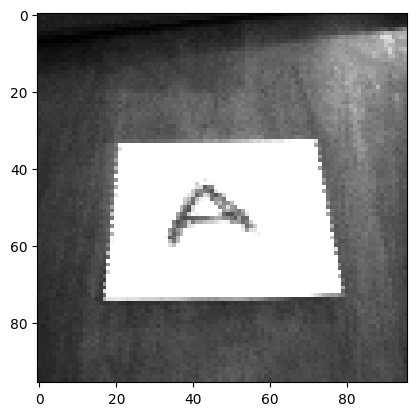

In [30]:
buffer = bytearray(96 * 96)
img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img.flat[::-1] = buffer

plt.imshow(img, cmap="gray")
plt.show()

(96, 96)

### <span style="color:red"> Exercise 6 </span>

Use the camera to acquire an image of yourself with your hand up, and an image of yourself with your hands down. Use these two frames (you are welcome to use more than 2 frames if desired) to create a video of yourself moving your hands up and down.

<h3 style="background-color:lightblue"> Write Answers for Exercise 6 Below </h3>

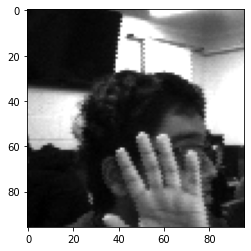

In [14]:
buffer = bytearray(96 * 96)
img_up = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_up.flat[::-1] = buffer

plt.imshow(img_up, cmap="gray")
plt.show()

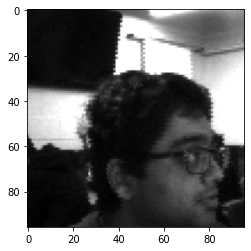

In [15]:
buffer = bytearray(96 * 96)
img_down = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_down.flat[::-1] = buffer

plt.imshow(img_down, cmap="gray")
plt.show()

In [16]:
aneesh_video = [img_up, img_down]
    
i = 0
while True:
    cv2.imshow('frame', aneesh_video[i%2])
    i = i + 1
    if cv2.waitKey(1000) == ord('q'): # press Q on keyboard to stop
         break

cv2.destroyAllWindows()

### Streaming video

Now that we can capture a still image, the next goal is to stream a video. Both cells will have to be run before the video is streamed to your screen. After running the first one, a still image should pop up but once you run the second cell it should start streaming what your camera is seeing in real-time.

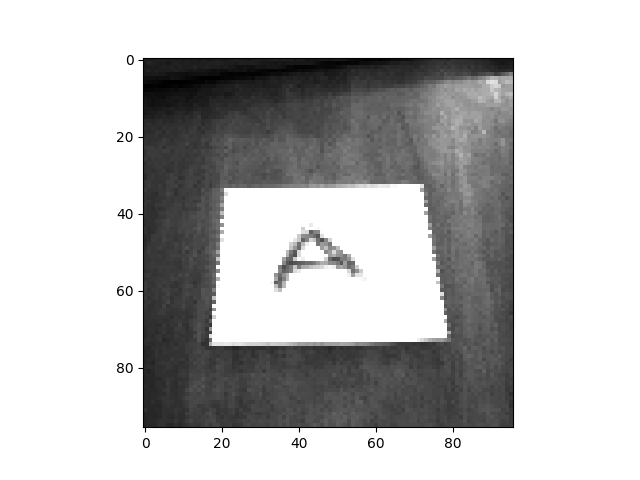

In [31]:
%matplotlib widget

fig, ax = plt.subplots()
render = ax.imshow(img, cmap='gray')
plt.show(block=False)

In [7]:
try:
    with serial.Serial(port, timeout=1) as s:
        while True:
            s.read_until(b"\x55\xAA")
            s.readinto(buffer)
            img.flat[::-1] = buffer
            render.set_data(img)
            fig.canvas.draw()
except KeyboardInterrupt:
    pass

When you are done, you will have to hit the `Interrupt Kernel` button, which can found at the top of the screen (the stop symbol) or under Kernel.

## <span style="color:orange;"> 4. Modifying Your Own Video </span>

Now that you are able to capture your own video, you will try the same modifications you made on the prerecorded videos on the one you recorded.

### <span style="color:red"> Exercise 7 </span>

Capture and save a video using the camera.

**Part 1:** Either trim both ends of the video or remove a section in the middle.

**Part 2:** Record a second video. Splice the two videos together.

**Part 3:** Pick an editing function we haven't mentioned (e.g., adding text, video filters, etc.) and try it out on either the prerecorded video or the one you recorded using the camera.


<h3 style="background-color:lightblue"> Write Answers for Exercise 7 Below </h3>

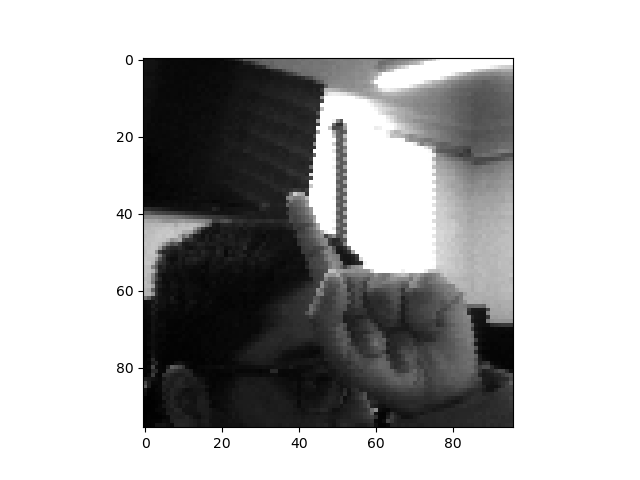

In [11]:
buffer = bytearray(96 * 96)
img_1 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_1.flat[::-1] = buffer

plt.imshow(img_1, cmap="gray")
plt.show()

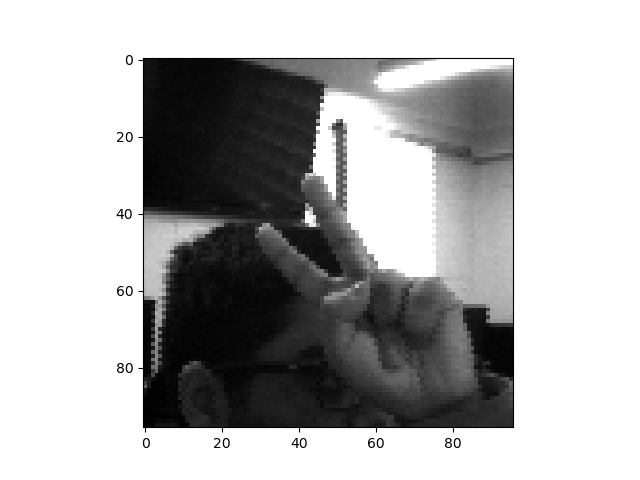

In [12]:
buffer = bytearray(96 * 96)
img_2 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_2.flat[::-1] = buffer

plt.imshow(img_2, cmap="gray")
plt.show()

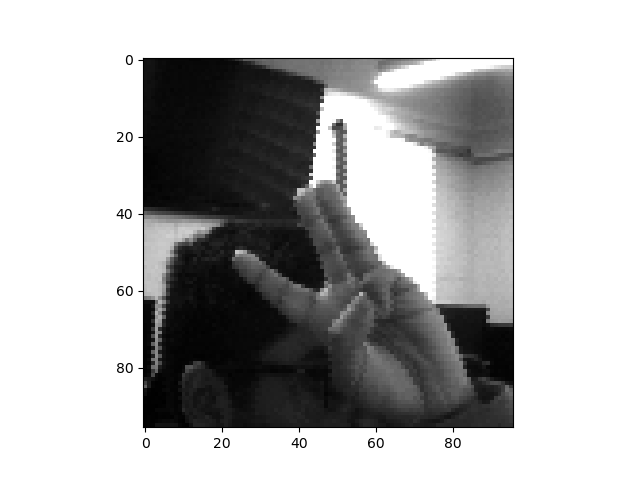

In [13]:
buffer = bytearray(96 * 96)
img_3 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_3.flat[::-1] = buffer

plt.imshow(img_3, cmap="gray")
plt.show()

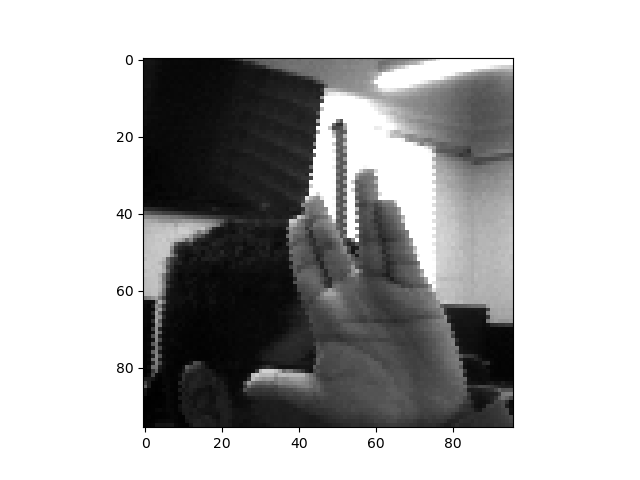

In [15]:
buffer = bytearray(96 * 96)
img_4 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_4.flat[::-1] = buffer

plt.imshow(img_4, cmap="gray")
plt.show()

In [26]:
frames = [img_1, img_2, img_3, img_4]

for frame in frames:
    #rame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #rame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1000) == ord('q'): # press Q on keyboard to stop
        break
        
cv2.destroyAllWindows()

In [41]:
# This video has 4 frames, I will remove the middle two:

frames = [img_1, img_2, img_3, img_4]
frames = frames[1:3]

for frame in frames:
    #rame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #rame = cv2.resize(frame,dsize=new_size)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1000) == ord('q'): # press Q on keyboard to stop
        break
        
cv2.destroyAllWindows()

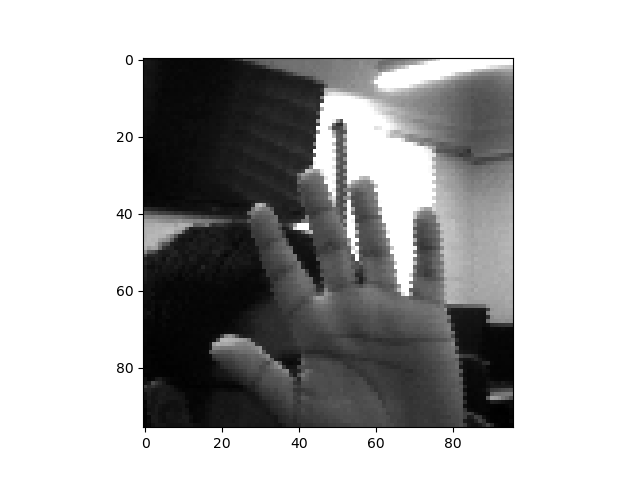

In [44]:
buffer = bytearray(96 * 96)
img_5 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_5.flat[::-1] = buffer

plt.imshow(img_5, cmap="gray")
plt.show()

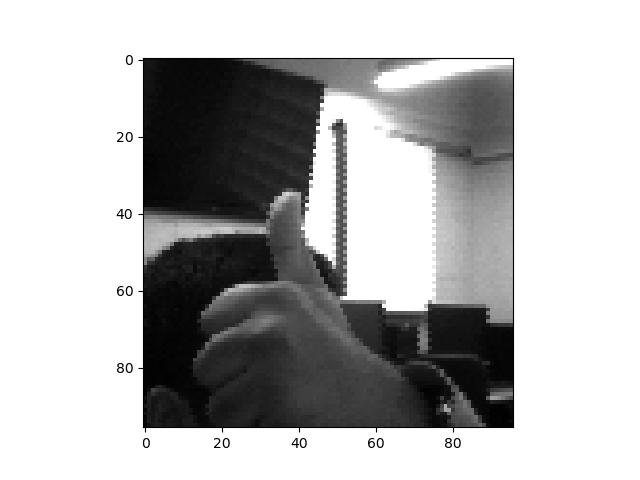

In [45]:
buffer = bytearray(96 * 96)
img_6 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_6.flat[::-1] = buffer

plt.imshow(img_6, cmap="gray")
plt.show()

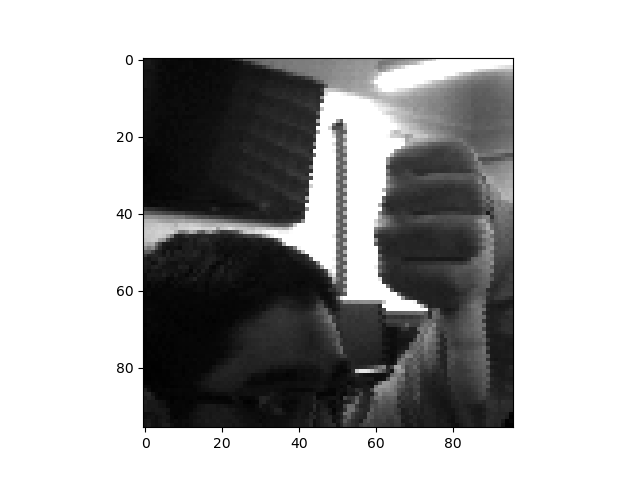

In [47]:
buffer = bytearray(96 * 96)
img_7 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_7.flat[::-1] = buffer

plt.imshow(img_7, cmap="gray")
plt.show()

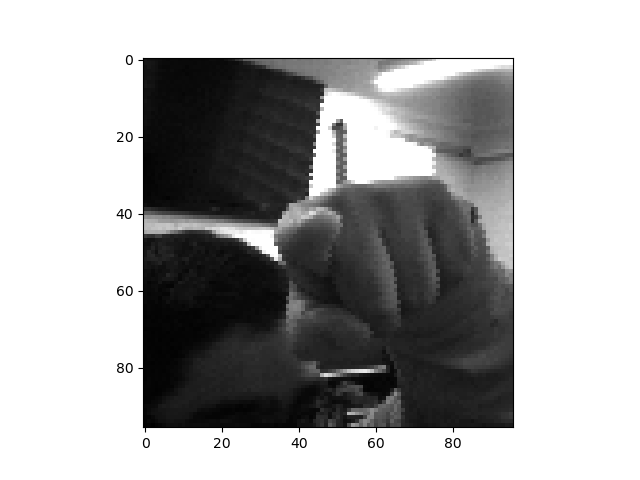

In [52]:
buffer = bytearray(96 * 96)
img_8 = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img_8.flat[::-1] = buffer

plt.imshow(img_8, cmap="gray")
plt.show()

In [54]:
frames_2 = [img_5, img_6, img_7, img_8]

for frame in frames_2:
    cv2.imshow('frame', frame)
    if cv2.waitKey(1000) == ord('q'): # press Q on keyboard to stop
        break
        
cv2.destroyAllWindows()

In [57]:
# Splicing the two video together
frames = [img_1, img_2, img_3, img_4]
frames_2 = [img_5, img_6, img_7, img_8]
frames_3 = frames + frames_2

for frame in frames_3:
    cv2.imshow('frame', frame)
    if cv2.waitKey(1000) == ord('q'): # press Q on keyboard to stop
        break
        
cv2.destroyAllWindows()

In [67]:
# Putting text on the video

vid = cv2.VideoCapture('test_vid.mov') 
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH) 


scale = 0.25
new_size = (int(width*scale),int(height*scale))
while vid.isOpened():
    success, frame = vid.read()
    if not success:
        print("Unable to read frame. Exiting ...")
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,dsize=new_size)
    cv2.putText(frame,'Good Morning!', (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1, 2)
    cv2.imshow('frame', frame)
    if cv2.waitKey(25) == ord('q'): # press Q on keyboard to stop
        break


video_1()
vid.release()
cv2.destroyAllWindows()

## <span style="color:green"> Reflection </span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

Answer Key